In [ ]:
## using Men_height_weight.csv for linear regression

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
s1_data = pd.read_csv('C:\data\Mens_height_weight.csv')

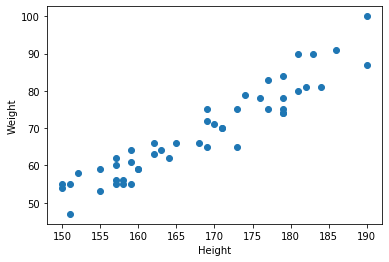

In [4]:
fig, ax = plt.subplots(1,1)
ax.scatter(s1_data['Height'], s1_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

In [ ]:
## lets see how the variables are correlated to each other as follows

In [5]:
s1_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


In [ ]:
### pearson correlation value coefficient of 0.94
### correlation ranges from -1 to +1, 

In [9]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [10]:
# Train the model using the training sets
lm.fit(s1_data.Height[:,np.newaxis], s1_data.Weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Intercept is ' + str(lm.intercept_) )

Intercept is -99.2772096062733


In [13]:
print ('Coefficient value of the height is ' + str(lm.coef_))

Coefficient value of the height is [1.00092142]


In [14]:
print (pd.DataFrame(zip(s1_data.columns, lm.coef_), columns=['features','estimatedCoefficients']))

  features  estimatedCoefficients
0   Height               1.000921


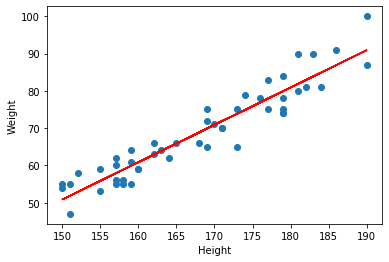

In [15]:
fig, ax = plt.subplots(1,1)
ax.scatter(s1_data.Height, s1_data.Weight)
ax.plot(s1_data.Height, lm.predict(s1_data.Height[:, np.newaxis]),color='red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

In [16]:
# Multiple Linear regression occurs when more than one independant
## variable is used to predict a dependant variable
## Y' = a+b1x1+b2x2+.....+bnxn
## note that squaring the dependent variable still makes it linear,
## but if the coefficient is squared, then it is nonlinear

In [19]:
b_data=pd.read_csv("C:\\data\\basketball.csv")
b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [ ]:
# The average  height of a basketball player is around 6.5ft
# The shortest player is 5.7 ft
# The tallest player is 7.7 ft
# the palyer with least weight is at 105 pounds, which is quite obscure
# the heaviest player is 263 pounds
# the best field goal percentage for a player is 60%
# the worst field goal percentage for a player is 29%
# the average field goal attempt for a player is 45%, but
# - from the small standard deviation, we can see that a majority
# of the players have a field goal percentage between 40 and 50%
# Among free throws, there is a player who misses 3/4th of the time
# the best free throw player has 90% success rate
# The most of the players have a success percentage for free throws 
# - around  70 to 80%
# the highest score scored per game by a player is 27
# the least scored is 3
# On an average, the players score 12 points

In [20]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


In [ ]:
# there is hight correlation between height and weight
# there is a weak positive correlation between successful field goals 
# --in terms of height and weight
# The average points scored seem to have the maximum correlation with
# --success_field_goals, buty they'r not hightly correlated

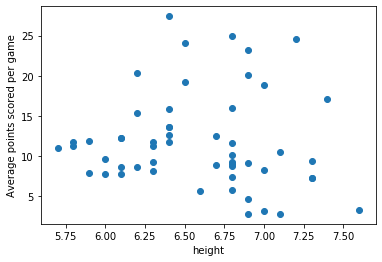

In [22]:
# Let's see the distribution of each independant variables w.r.t
# --dependant variable
fig, ax = plt.subplots(1,1)
ax.scatter(b_data.height, b_data.avg_points_scored)
ax.set_xlabel('height')
ax.set_ylabel('Average points scored per game')
plt.show()

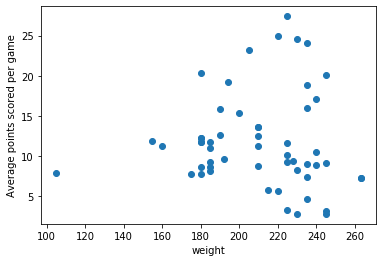

In [23]:
#lets look at the distribution between average points scored and the weight
fig, ax = plt.subplots(1,1)
ax.scatter(b_data.weight, b_data.avg_points_scored)
ax.set_xlabel('weight')
ax.set_ylabel('Average points scored per game')
plt.show()

In [ ]:
# we can see that 105 pounds seems like an outlier and also has
# --a relatively lower average point score. We can see that players
# --

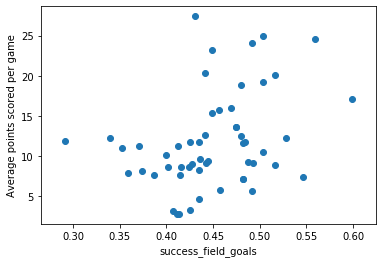

In [24]:
#Lets look at the distribution between successful field goals
# and the average points scored:
fig, ax = plt.subplots(1,1)
ax.scatter(b_data.success_field_goals, b_data.avg_points_scored)
ax.set_xlabel('success_field_goals')
ax.set_ylabel('Average points scored per game')
plt.show()

In [ ]:
## success_field_goals variables has some linear relationship with the
## average points scored, but the distinction is still quite scattered

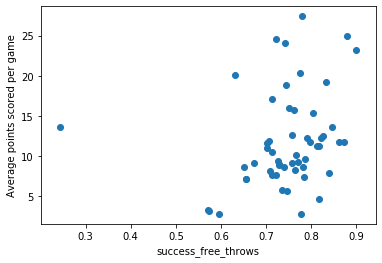

In [26]:
## lets look at the distribution between successful free throws and
## and the average points scored per game:
fig, ax = plt.subplots(1,1)
ax.scatter(b_data.success_free_throws, b_data.avg_points_scored)
ax.set_xlabel('success_free_throws')
ax.set_ylabel('Average points scored per game')
plt.show()

In [ ]:
## we can see there is a player whose free throws are quite bad,
## but the average points scored seem to be close to a average 
## as compared to other players, which means that he would be better
## at half field goals or he would make a lot of attempts to score
## The overall distribution here is also quite scattered

In [ ]:
# Training and testing a model

In [29]:
from sklearn import linear_model, feature_selection, preprocessing

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [32]:
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

In [35]:
X = b_data.values.copy()
X_train, X_valid, y_train, y_valid = train_test_split(X[:, :-1], X[:,-1],train_size=0.80)

In [ ]:
## SciKit package

In [ ]:
## pandas provides an Ordinary Least Square regression, is a method to estimate
## unknown coefficients and intercepts for a regression equation.

In [37]:
## statsmodels module
import statsmodels.api as sm
result = sm.OLS(y_train, add_constant(X_train)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.123
Date:                Fri, 04 Oct 2019   Prob (F-statistic):             0.0968
Time:                        22:59:59   Log-Likelihood:                -132.45
No. Observations:                  43   AIC:                             274.9
Df Residuals:                      38   BIC:                             283.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6893     19.286     -0.451      0.655     -47.732      30.353
x1             0.2464      4.186      0.059      0.953      -8.227       8.720
x2            -0.0389      0.059     -0.661      0.513      -0.158       0.080
x3            39.3574     17.761      2.216      0.033       3.401      75.314
x4            12.4580      8.900      1.400      0.170      -5.558      30.474
==============================================================================
Omnibus:                        9.059   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.182
Skew:                           1.006   Prob(JB):                       0.0167
Kurtosis:                       3.719   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## OLS function helps in creating the linear regression object with
## a dependant and independant variable
## add_constant() function, which is used to calculate the intercept
## while creating the model. By default OLS() function won't 
## calculate the intercept, and it has to be explicitly mentioned
## with the help of the add_constant function. 


In [ ]:
## R square value tells that how much of the variance of the
## dependant variable is captured by the model. It ranges from 0 to 1
# p value tells us if the model is significant

In [ ]:
#  we can see that the R-square value is 0.183, which isn't great.
# We can see that the model shows x3 as the most significant variable,
# which is the success_field_goals variable. As a rule of thumb,
# any p value of a variable less than 0.05 can be considered significant

In [38]:
## Lets recreate the model with only the successful field goals variable
## and see how the model performs
result_alternate = sm.OLS(y_train, add_constant(X_train[:,2])).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.547
Date:                Fri, 04 Oct 2019   Prob (F-statistic):             0.0667
Time:                        23:13:57   Log-Likelihood:                -135.01
No. Observations:                  43   AIC:                             274.0
Df Residuals:                      41   BIC:                             277.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0775      6.985     -0.154      0.878     -15.183      13.028
x1            28.7945     15.288      1.883      0.067      -2.081      59.670
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.143
Skew:                           0.827   Prob(JB):                       0.0764
Kurtosis:                       3.366   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## that the variable has become less significant, and the r square
## value has become really low. the preceding model can be iterated
## multiple times with the different combination of variables till
## the best model is arrived at..

In [ ]:
## lets apply both these models on the test data and see how
## the mean squared error between the actual and the predicted
## value is. 
## The model that gives the least mean squared error is a good model


In [40]:
ypred = result.predict(add_constant(X_valid))
print (mse(ypred, y_valid))

27.323439729310415


In [42]:
ypred_alternate = result_alternate.predict(add_constant(X_valid[:,2]))
print(mse(ypred_alternate, y_valid))

27.019352844327656


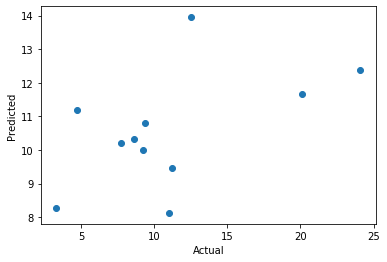

In [43]:
## lets also plot the predicted versus actual plot for both the models:
fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

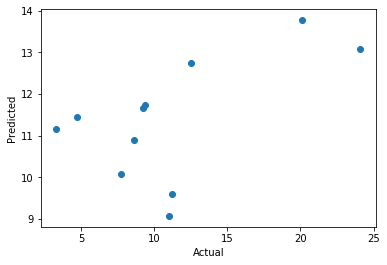

In [44]:
## lets plot the scatter for the alternate model:
fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
## this clearly shows that our models are not good enough since the
## predictions are quite random. To make a highly accurate model, we need
## some more variables, which have an influence on the average points
## that are scored

In [45]:
#lets try with SciKit
lm = LinearRegression()

In [46]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print('Intercept is %f' %lm.intercept_)

Intercept is -8.689344


In [49]:
pd.DataFrame(zip(b_data.columns,lm.coef_), columns=['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,height,0.246432
1,weight,-0.038881
2,success_field_goals,39.357358
3,success_free_throws,12.458012


In [ ]:
## Coefficient and intercepts are similar to the model that was 
## built using the statsmodel package

In [52]:
## To calculate teh r square in SciKit, the cross-validation module
cross_validate(lm, X_train, y_train, scoring='r2')

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.00099802, 0.00099683, 0.00099969]),
 'score_time': array([0.00199199, 0.        , 0.        ]),
 'test_score': array([ 0.00593486, -0.21358548, -0.19236217])}

In [53]:
ypred = lm.predict(X_valid)
mean_squared_error(ypred, y_valid)

27.323439729310532

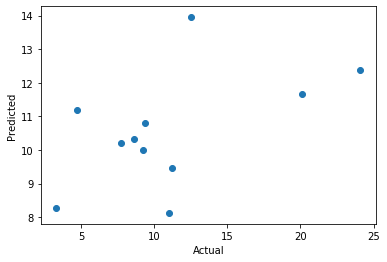

In [54]:
fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()